# Cleaning data
Main takeaways:
 - In this case cleaning up outlying values did not help with the prediction accuracy
 - Helped with the accuracy of the limited range of values
 
 Known limitations of this notebook:
 - no test-set-validation
 - no normalization

In [26]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from helper import charts, lib

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [3]:
# Import the dataset.
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

#scale the label
training_df["median_house_value"] /= 1000.0

#set the label name early
my_label="median_house_value" # the median value of a house on a specific city block.

### Removing outlying values, creating 4 versions: 
 - outliers removed from both housing_median_age and median_house_value
 - outliers removed from only one of them
 - no outliers removed

In [4]:
#names will be hma, mhv, both, none

#because they occur a lot
hma = "housing_median_age"
mhv = "median_house_value"

hma_max = training_df[hma].max()
_hma_drop = training_df.loc[training_df[hma] == hma_max].index
print("Dataset contains", len(_hma_drop), "elements in the '",hma,"' column with the value", hma_max, "(max value)")

mhv_max = training_df[mhv].max()
_mhv_drop = training_df.loc[training_df[mhv] == mhv_max].index
print("Dataset contains", len(_mhv_drop), "elements in the '",mhv,"' column with the value", mhv_max, "(max value)")



Dataset contains 1052 elements in the ' housing_median_age ' column with the value 52.0 (max value)
Dataset contains 814 elements in the ' median_house_value ' column with the value 500.001 (max value)


In [5]:
hma_df = training_df.drop(_hma_drop)
mhv_df = training_df.drop(_mhv_drop)
both_df = hma_df.drop(_mhv_drop, errors='ignore')
none_df = training_df.copy(deep=True)

In [6]:
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(units=1, input_shape=(6,)))
 
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model        


def train_model(model, training_df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""
  history = model.fit(
    x=training_df[feature],
    y=training_df[label],
    batch_size=batch_size,
    #validation_data=(training_df[feature], training_df[label]), #the weights shouldn't be influenced by the model, but the overall accurarcy should be measured against all datapoints
    epochs=epochs)

  return pd.DataFrame(history.history)

In [7]:
# Specify the feature and the label.
my_feature = ["longitude", "latitude", "total_rooms", "total_bedrooms", "population", "households"]

In [8]:
# Hyperparameters for none
learning_rate = 0.01
epoch_count = 20
batch_size = 64

# Build model
none_model = build_model(learning_rate)
none_history = train_model(none_model, none_df, my_feature, my_label, epoch_count, batch_size)

Epoch 1/20
266/266 [==============================] - 1s 943us/step - loss: 745989.1875 - root_mean_squared_error: 863.7067
Epoch 2/20
266/266 [==============================] - 0s 891us/step - loss: 47584.3477 - root_mean_squared_error: 218.1384
Epoch 3/20
266/266 [==============================] - 0s 1ms/step - loss: 26509.8555 - root_mean_squared_error: 162.8185
Epoch 4/20
266/266 [==============================] - 0s 894us/step - loss: 17406.8730 - root_mean_squared_error: 131.9351
Epoch 5/20
266/266 [==============================] - 0s 887us/step - loss: 13921.2178 - root_mean_squared_error: 117.9882
Epoch 6/20
266/266 [==============================] - 0s 894us/step - loss: 12702.4072 - root_mean_squared_error: 112.7050
Epoch 7/20
266/266 [==============================] - 0s 875us/step - loss: 12177.0576 - root_mean_squared_error: 110.3497
Epoch 8/20
266/266 [==============================] - 0s 928us/step - loss: 12043.9873 - root_mean_squared_error: 109.7451
Epoch 9/20
266/26

In [9]:
# Hyperparameters for mhv
learning_rate = 0.01
epoch_count = 20
batch_size = 64

# Build model
mhv_model = build_model(learning_rate)
mhv_history = train_model(mhv_model, mhv_df, my_feature, my_label, epoch_count, batch_size)

Epoch 1/20
253/253 [==============================] - 1s 1ms/step - loss: 110133.3984 - root_mean_squared_error: 331.8635
Epoch 2/20
253/253 [==============================] - 0s 901us/step - loss: 25334.6094 - root_mean_squared_error: 159.1685
Epoch 3/20
253/253 [==============================] - 0s 941us/step - loss: 12508.7295 - root_mean_squared_error: 111.8424
Epoch 4/20
253/253 [==============================] - 0s 948us/step - loss: 9878.9834 - root_mean_squared_error: 99.3931
Epoch 5/20
253/253 [==============================] - 0s 968us/step - loss: 9301.2266 - root_mean_squared_error: 96.4429
Epoch 6/20
253/253 [==============================] - 0s 1ms/step - loss: 9211.5273 - root_mean_squared_error: 95.9767
Epoch 7/20
253/253 [==============================] - 0s 986us/step - loss: 9062.7197 - root_mean_squared_error: 95.1983
Epoch 8/20
253/253 [==============================] - 0s 990us/step - loss: 9031.9316 - root_mean_squared_error: 95.0365
Epoch 9/20
253/253 [=========

In [10]:
# Hyperparameters for HMA
learning_rate = 0.01
epoch_count = 20
batch_size = 64

# Build model
hma_model = build_model(learning_rate)
hma_history = train_model(hma_model, hma_df, my_feature, my_label, epoch_count, batch_size)

Epoch 1/20
250/250 [==============================] - 1s 964us/step - loss: 237023.1875 - root_mean_squared_error: 486.8503
Epoch 2/20
250/250 [==============================] - 0s 1ms/step - loss: 34260.7500 - root_mean_squared_error: 185.0966
Epoch 3/20
250/250 [==============================] - 0s 1ms/step - loss: 13341.6299 - root_mean_squared_error: 115.5060
Epoch 4/20
250/250 [==============================] - 0s 999us/step - loss: 11560.9463 - root_mean_squared_error: 107.5218
Epoch 5/20
250/250 [==============================] - 0s 992us/step - loss: 11311.6660 - root_mean_squared_error: 106.3563
Epoch 6/20
250/250 [==============================] - 0s 997us/step - loss: 11346.6562 - root_mean_squared_error: 106.5207
Epoch 7/20
250/250 [==============================] - 0s 993us/step - loss: 11298.3701 - root_mean_squared_error: 106.2938
Epoch 8/20
250/250 [==============================] - 0s 1ms/step - loss: 11421.5215 - root_mean_squared_error: 106.8715
Epoch 9/20
250/250 [=

In [11]:
# Hyperparameters for both
learning_rate = 0.01
epoch_count = 20
batch_size = 64

# Build model
both_model = build_model(learning_rate)
both_history = train_model(both_model, both_df, my_feature, my_label, epoch_count, batch_size)

Epoch 1/20
239/239 [==============================] - 1s 979us/step - loss: 315422.4062 - root_mean_squared_error: 561.6248
Epoch 2/20
239/239 [==============================] - 0s 962us/step - loss: 68456.8672 - root_mean_squared_error: 261.6426
Epoch 3/20
239/239 [==============================] - 0s 992us/step - loss: 14319.0166 - root_mean_squared_error: 119.6621
Epoch 4/20
239/239 [==============================] - 0s 958us/step - loss: 8686.8477 - root_mean_squared_error: 93.2033
Epoch 5/20
239/239 [==============================] - 0s 849us/step - loss: 8380.3154 - root_mean_squared_error: 91.5441
Epoch 6/20
239/239 [==============================] - 0s 941us/step - loss: 8409.2646 - root_mean_squared_error: 91.7020
Epoch 7/20
239/239 [==============================] - 0s 979us/step - loss: 8398.4414 - root_mean_squared_error: 91.6430
Epoch 8/20
239/239 [==============================] - 0s 895us/step - loss: 8379.7656 - root_mean_squared_error: 91.5411
Epoch 9/20
239/239 [=====

In [29]:
#examining history
rmse = "root_mean_squared_error"

none_key = "Original"
mhv_key = "MHV cleaned"
hma_key = "HMA cleaned"
both_key = "Both cleaned"

keys = [none_key, mhv_key, hma_key, both_key]

together_df = pd.DataFrame({
    none_key : none_history[rmse],
    mhv_key : mhv_history[rmse],
    hma_key : hma_history[rmse],
    both_key : both_history[rmse]
})

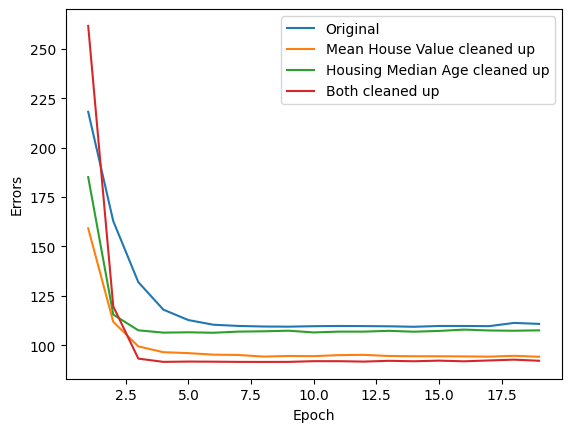

In [13]:
#plotting basic rmse history of the three different methods
charts.plot_training_losses(losses=keys, df=together_df, ignore_first=True)

In [14]:
#sampling data
samples = []
samples.append(lib.create_inference_sample(training_df, my_feature, none_model))
samples.append(lib.create_inference_sample(training_df, my_feature, mhv_model))
samples.append(lib.create_inference_sample(training_df, my_feature, hma_model))
samples.append(lib.create_inference_sample(training_df, my_feature, both_model))

7/7 [==============================] - 0s 1ms/step


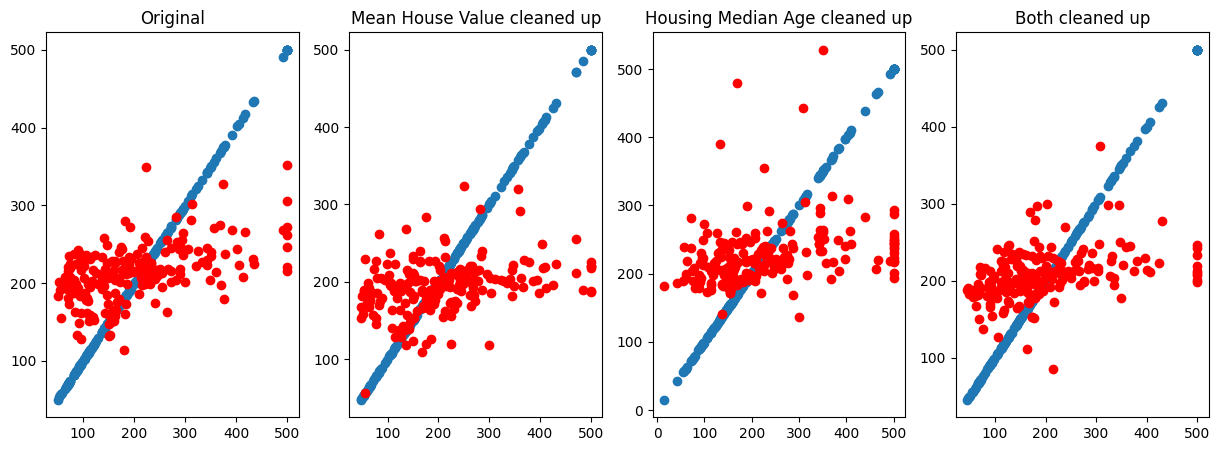

In [15]:
charts.plot_training_test_validat_accuracy(
    dfs=samples,
    label_key=my_label,
    titles=keys,
    columns=4
)

In [24]:
#calculating accuracy values for both original dataset and cleaned up dataset for each model

print("No cleaning metrics:")
none_accuracy_full = none_model.evaluate(training_df[my_feature], training_df[my_label])[1]
none_accuracy_cleaned = none_model.evaluate(training_df[my_feature], training_df[my_label])[1]

print("MHV cleaned metrics:")
mhv_accuracy_full = mhv_model.evaluate(training_df[my_feature], training_df[my_label])[1]
mhv_accuracy_cleaned = mhv_model.evaluate(mhv_df[my_feature], mhv_df[my_label])[1]

print("HMA cleaned metrics:")
hma_accuracy_full = hma_model.evaluate(training_df[my_feature], training_df[my_label])[1]
hma_accuracy_cleaned = hma_model.evaluate(hma_df[my_feature], hma_df[my_label])[1]

print("Both cleaned metrics:")
both_accuracy_full = both_model.evaluate(training_df[my_feature], training_df[my_label])[1]
both_accuracy_cleaned = both_model.evaluate(both_df[my_feature], both_df[my_label])[1]

No cleaning metrics:
532/532 [==============================] - 1s 2ms/step - loss: 11876.1660 - root_mean_squared_error: 108.9778
MHV cleaned metrics:
506/506 [==============================] - 1s 1ms/step - loss: 8606.0381 - root_mean_squared_error: 92.7687
HMA cleaned metrics:
499/499 [==============================] - 1s 2ms/step - loss: 11705.4219 - root_mean_squared_error: 108.1916
Both cleaned metrics:
478/478 [==============================] - 1s 2ms/step - loss: 8376.0742 - root_mean_squared_error: 91.5209


<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

([<matplotlib.axis.XTick at 0x21b2a029e40>,
 [Text(0, 0, 'Original'),
  Text(1, 0, 'MHV cleaned'),
  Text(2, 0, 'HMA cleaned'),
  Text(3, 0, 'Both cleaned')])

Text(0.5, 0, 'Datasets')

Text(0, 0.5, 'Root Mean Square Error')

Text(0.5, 1.0, 'RMSE dropoff with full data')

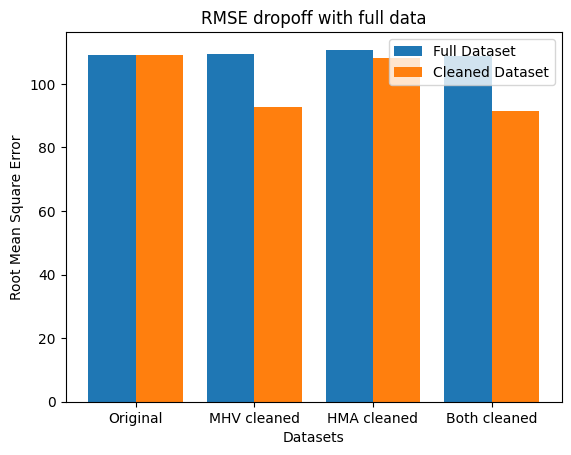

In [31]:
#Plot the differences
full_accuracies = [none_accuracy_full, mhv_accuracy_full, hma_accuracy_full, both_accuracy_full]
cleaned_accuracies = [none_accuracy_cleaned, mhv_accuracy_cleaned, hma_accuracy_cleaned, both_accuracy_cleaned]
  
x_axis = np.arange(len(keys))
  
plt.bar(x_axis - 0.2, full_accuracies, 0.4, label = 'Full Dataset')
plt.bar(x_axis + 0.2, cleaned_accuracies, 0.4, label = 'Cleaned Dataset')
  
plt.xticks(x_axis, keys)

plt.xlabel("Datasets")
plt.ylabel("Root Mean Square Error")
plt.title("RMSE dropoff with full data")

plt.legend()
plt.show()